*Media aritmética o promedio.*

******
**Media**: Medida que se calcula sumando el total de los datos o valores de la variable para luego dividir esa suma entre el número de datos sumados.
******

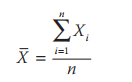

la media es igual a la sumatoria desde i igual a 1 hasta n, de las observaciones X

In [3]:
from prettytable import PrettyTable

def pretty_table(data, varX="x", frecuencia="f"):
    table = PrettyTable()
    table.field_names = [varX, frecuencia]
    for key, value in data.items():
        table.add_row([key, value])
    return table

3.1 La media en una serie simple

In [11]:
# ejemplo 3.1
edad_padres_familia = [55 , 58 , 78 , 52 , 54 , 63 , 52 , 52 , 64 , 56 , 58 , 78 , 54 , 65 , 58 , 56 , 50 , 52 , 53 , 58 , 49 , 53 , 63 , 52 , 50 , 54 , 54 , 56 , 63 , 48 , 63 , 68 , 55 , 57 , 49 , 53 , 68 , 54 , 46 , 75 , 56 , 65 , 54 , 50 , 65 , 64 , 65 , 65 , 54 , 50 , 52 , 65 , 68 , 63 , 55 , 55 , 58 , 65 , 52 , 70]

In [4]:
from typing import List

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

In [ ]:
media = mean(edad_padres_familia)
print(f'Media (promedio): {media} Total: {sum(edad_padres_familia)}')

Media (promedio): 58.11666666666667 Total: 3487


ejercicio 3.2 La media en una serie de datos y frecuencias

Agrupar los datos de edades en una tabla de datos y frecuencias
y calcular la media aritmética

Los datos se agrupan en las 2 primeras columna:

In [14]:
from collections import defaultdict
frecuencia_edades_padres = defaultdict(int)

# x(edad) 
for x in sorted(edad_padres_familia):
    frecuencia_edades_padres[x] += 1
#serie de datos con frecuencia 
tabla = pretty_table (frecuencia_edades_padres, "Salario de la Zona A (x)", "Frecuencia (f)")
print(tabla)

+--------------------------+----------------+
| Salario de la Zona A (x) | Frecuencia (f) |
+--------------------------+----------------+
|            46            |       1        |
|            48            |       1        |
|            49            |       2        |
|            50            |       4        |
|            52            |       7        |
|            53            |       3        |
|            54            |       7        |
|            55            |       4        |
|            56            |       4        |
|            57            |       1        |
|            58            |       5        |
|            63            |       5        |
|            64            |       2        |
|            65            |       7        |
|            68            |       3        |
|            70            |       1        |
|            75            |       1        |
|            78            |       2        |
+--------------------------+------

como el cálculo de la media aritmética requiere que se sumen todos los datos, si éstos se agrupan de acuerdo con su frecuencia, sumarlos equivale a sumar los productos de cada dato (*x*) por la frecuencia correspondiente (*f*), ya que, por ejemplo,
como el valor 50 aparece 4 veces, es lo mismo sumar 4 veces 50 que multiplicar 50 por 4. Se resumen estas operaciones en la columna con encabezado “*f (x)*”.

In [ ]:

distribucion = defaultdict(dict)

for variable_x, frecuencia in frecuencia_edades_padres.items():
    tabla_frec = defaultdict(lambda: [0, 0])
    tabla_frec[variable_x][0] = frecuencia
    # PASO 1: Multiplicar cada dato por la frecuencia correspondiente: f (x )
    tabla_frec[variable_x][1] = variable_x * frecuencia    
    distribucion[variable_x] = tabla_frec[variable_x]


In [24]:
table = PrettyTable()
table.field_names = ["x(edad)", "f", "f(x)"]
for key, value in distribucion.items():
    table.add_row([key, value[0], value[1]])
table.add_divider()
table.add_row(["Total", sum([value[0] for value in distribucion.values()]), sum([value[1] for value in distribucion.values()])])
print(table)

+---------+----+------+
| x(edad) | f  | f(x) |
+---------+----+------+
|    46   | 1  |  46  |
|    48   | 1  |  48  |
|    49   | 2  |  98  |
|    50   | 4  | 200  |
|    52   | 7  | 364  |
|    53   | 3  | 159  |
|    54   | 7  | 378  |
|    55   | 4  | 220  |
|    56   | 4  | 224  |
|    57   | 1  |  57  |
|    58   | 5  | 290  |
|    63   | 5  | 315  |
|    64   | 2  | 128  |
|    65   | 7  | 455  |
|    68   | 3  | 204  |
|    70   | 1  |  70  |
|    75   | 1  |  75  |
|    78   | 2  | 156  |
+---------+----+------+
|  Total  | 60 | 3487 |
+---------+----+------+


In [29]:
#PASO 2: Sumar estos productos: Σf(x)
suma_fx = sum([value[1] for value in distribucion.values()])
assert suma_fx == sum(edad_padres_familia)

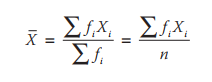

En donde,
*ΣfiXi* es la suma de los productos de cada valor por su frecuencia, y

*Σfi* es la suma de las frecuencias que es, a la vez, el número de
elementos de la serie, el número de padres de familia. Esto último en símbolos: *Σfi = n*.

In [ ]:
#PASO 3: Dividir esta suma entre el número de elementos, o sea la suma de las frecuencias:
#Σf. Nótese, además, que la suma de las frecuencias es igual al número de elementos o,
#en símbolos: Σfi = n
n = sum([value[0] for value in distribucion.values()])
assert n == len(edad_padres_familia)

media_fx = suma_fx / n
print(f'{suma_fx} / {n} -> Media (promedio): {media_fx}')
assert media == media_fx

3487 / 60 -> Media (promedio): 58.11666666666667


la cual es el mismo resultado que se obtuvo antes

*ejemplo 3.3 La media en una serie de clases y frecuencias*

Convertir los datos de las edades de los 60 padres de familia en
una serie de clases y frecuencias y calcular la media aritmética a
partir de esta serie.

In [ ]:
# Agrupamiento de las edades de 60 padres de familia en una serie de clases y 
# frecuencias (columnas “x” y “f ”) y cálculos para determinar la media


In [35]:
def distribucion_frecuencia(serie:list, min=0, max=10, incr=10) -> dict:
    # crear un diccionario con indice de min a max con incrementos de incr
    distribucion = defaultdict(int)
    for i in range(min, max, incr):
        distribucion[f'{i} a menos de {( i + incr )}'] = 0
        # sumar los valores de la serie que cumplan con la condición
        distribucion[f'{i} a menos de {( i + incr )}'] = sum(map(lambda x: i <= x < i + incr, serie))
    return distribucion  

In [36]:
import math
def reglaSturges(datos):
     # Determinar el número de clases o intervalos utilizando la raíz cuadrada del número de elementos de la serie.
     intervalos = math.ceil(math.sqrt(len(datos)))
     # Establecer el rango de los datos: máximo – mínimo
     rango = max(datos) - min(datos)
     # Dividir el rango entre el número de clases para determinar los intervalos de clase 
     # (este paso normalmente requiere de redondeos y ajustes para llegar, de preferencia, 
     # a valores enteros y gruesos, como decenas, por ejemplo)
     amplitud_clase = rango / intervalos
     # Determinar cuántos de los datos caen dentro de cada clase     
     return amplitud_clase

In [43]:
amplitud_clase = reglaSturges(sorted(edad_padres_familia))
print(amplitud_clase)


4.0


In [44]:

# construir 7 clases de amplitud 8,  para obtener el siguiente conjunto de clases
clase_padres_familia= distribucion_frecuencia(
    sorted(edad_padres_familia), 
    min=int(min(edad_padres_familia)-1),
    max=int(max(edad_padres_familia)), 
    incr = int(amplitud_clase+1)
)
serie_padres_familia = sum(map(lambda x: x[1], clase_padres_familia.items()))
assert serie_padres_familia == len(edad_padres_familia)

tabla = pretty_table (clase_padres_familia, "Edades (x)", "Frecuencia (f)")
print(tabla)

+------------------+----------------+
|    Edades (x)    | Frecuencia (f) |
+------------------+----------------+
| 45 a menos de 50 |       4        |
| 50 a menos de 55 |       21       |
| 55 a menos de 60 |       14       |
| 60 a menos de 65 |       7        |
| 65 a menos de 70 |       10       |
| 70 a menos de 75 |       1        |
| 75 a menos de 80 |       3        |
+------------------+----------------+


En el caso de una serie de clases y frecuencias, se pierde cierta
información al ubicar los valores dentro de rangos (las clases),
por lo que ya no se tienen los valores exactos, como se mencionó en el capítulo anterior. 

Para utilizar estos datos se emplea un valor para representar a todos los que se encuentran en cada clase. Este valor que representa a todos los de su clase es el **punto medio de clase o el valor central de cada clase** el cual es, precisamente, el promedio entre los 2 límites de cada clase

el procedimiento para el cálculo para una serie de clases
y frecuencias consiste en:

-  Determinar el punto medio de cada clase, Pm;
-  Multiplicar cada punto medio de clase por la frecuencia correspondiente, f (Pm);
-  Sumar estos productos, Σf (Pm);
-  Dividir esta suma entre el número de elementos, o sea la suma de las frecuencias Σf.

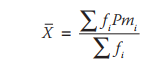

*******
**Punto medio de clase o valor central de cada clase**: Valor que representa a todos los de su clase
*******

In [ ]:
distribucion = defaultdict(dict)
for variable_x, frecuencia in clase_padres_familia.items():
    tabla_frec = defaultdict(lambda: [0, 0, 0])
    tabla_frec[variable_x][0] = frecuencia
    # Determinar el punto medio de cada clase, Pm;
    limite_inferior, limite_superior = map(int, variable_x.split(" ")[0:5:4])    
    # La primera clase va de 45 a menos de 50, por lo que su punto medio es (45+50)/2 = 47.5
    tabla_frec[variable_x][1] = (limite_inferior + limite_superior) / 2
    # Multiplicar cada punto medio por la frecuencia correspondiente: f (Pm)
    tabla_frec[variable_x][2] = tabla_frec[variable_x][1] * frecuencia

    distribucion[variable_x] = tabla_frec[variable_x]


In [ ]:
table = PrettyTable()
table.field_names = ["x(edad)", "f", "Pm","f(Pm)"]

for key, value in distribucion.items():
    table.add_row([key, value[0], value[1], value[2]])
table.add_divider()
table.add_row(["Total", sum([value[0] for value in distribucion.values()]),"", sum([value[2] for value in distribucion.values()])])
print(table)

+------------------+----+------+--------+
|     x(edad)      | f  | Pmx  | f(Pm)  |
+------------------+----+------+--------+
| 45 a menos de 50 | 4  | 47.5 | 190.0  |
| 50 a menos de 55 | 21 | 52.5 | 1102.5 |
| 55 a menos de 60 | 14 | 57.5 | 805.0  |
| 60 a menos de 65 | 7  | 62.5 | 437.5  |
| 65 a menos de 70 | 10 | 67.5 | 675.0  |
| 70 a menos de 75 | 1  | 72.5 |  72.5  |
| 75 a menos de 80 | 3  | 77.5 | 232.5  |
+------------------+----+------+--------+
|      Total       | 60 |      | 3515.0 |
+------------------+----+------+--------+


In [72]:
# Sumar estos productos, Σf (Pm);
suma_fx = sum([value[2] for value in distribucion.values()])

# Dividir esta suma entre el número de elementos, o sea la suma de las frecuencias: Σf. Nótese, además, que la suma de las frecuencias es igual al número de elementos o, en símbolos: Σfi = n
n = sum([value[0] for value in distribucion.values()])
assert n == len(edad_padres_familia)

# Determinar la media aritmética de la serie agrupada, x̄
media_fx = suma_fx / n
print(f'{suma_fx} / {n} -> Media (promedio): {media_fx}')


3515.0 / 60 -> Media (promedio): 58.583333333333336


Un detalle que es importante observar aquí es que este resultado
de la media, 58.58, no es igual al que se encontró para las tablas
simple y de datos y frecuencias, 58.12, y la razón es que, como
se comentó, el agrupamiento de los datos en clases hace que se
pierda información. Esto último se refleja en el uso del punto
medio de clase para representar a todos los elementos de cada
clase.

Sin embargo, por otro lado, esta pérdida de precisión en el cálculo de medidas a
partir de series de clases y frecuencias comúnmente se compensa por la sencillez en
el manejo de datos agrupados de esta manera. 

Cuando se tienen grandes cantidades de datos, una serie de clases y frecuencias es
la mejor manera de agruparlo

**Media ponderada**

*****
La media ponderada se utiliza principalmente para darle un peso relativo diferente
a cada uno de los valores de la variable.
*****

En la tabla  se presentan datos de precios de 10 acciones que
cotizan en una bolsa de valores, junto con el volumen negociado
(número de acciones negociadas) a determinada fecha y se incluye una columna final con el producto del precio por el volumen

In [ ]:
acciones_bursatiles = { 
    "CEL": [28.44, 1500, 42660],
    "CEMEXCPO" : [53.51, 4946300, 264676513], 
    "CIEB" : [22.99, 65500, 1505845], 
    "COMERCIUBC" : [15.16, 513600, 7786176], 
    "CONTAL" : [17.99, 866200 , 15582938], 
    "DESCB" : [2.8, 116100, 325080], 
    "ELEKTRACPO" : [75.95, 102000, 7746900], 
    "FEMSAUBD" : [74.76, 561900, 42007644], 
    "GCARSOA1" : [22.16, 576800, 12781888], 
    "GEOB" : [30.2, 1064800, 32156960]
}


In [13]:
table = PrettyTable()
table.field_names = ["Clave de la acción", "Precio de Cierre (C)", "Volumen Negociado (V)","C x V"]

for key, value in acciones_bursatiles.items():
    table.add_row([key, value[0], value[1], value[2]])
table.add_divider()
table.add_row(["Total", "{:,.2f}".format(sum([value[0] for value in acciones_bursatiles.values()])), "{:,.2f}".format(sum([value[1] for value in acciones_bursatiles.values()])), "{:,.2f}".format(sum([value[2] for value in acciones_bursatiles.values()]))])
print(table)

+--------------------+----------------------+-----------------------+----------------+
| Clave de la acción | Precio de Cierre (C) | Volumen Negociado (V) |     C x V      |
+--------------------+----------------------+-----------------------+----------------+
|        CEL         |        28.44         |          1500         |     42660      |
|      CEMEXCPO      |        53.51         |        4946300        |   264676513    |
|        CIEB        |        22.99         |         65500         |    1505845     |
|     COMERCIUBC     |        15.16         |         513600        |    7786176     |
|       CONTAL       |        17.99         |         866200        |    15582938    |
|       DESCB        |         2.8          |         116100        |     325080     |
|     ELEKTRACPO     |        75.95         |         102000        |    7746900     |
|      FEMSAUBD      |        74.76         |         561900        |    42007644    |
|      GCARSOA1      |        22.16        

Si se calcula la media aritmética de los precios se tiene:

In [12]:
media_precios = mean([value[0] for value in acciones_bursatiles.values()])
print(f'Media (promedio) de precios: ',"{:,.2f}".format(media_precios))


Media (promedio) de precios:  34.40


Sin embargo, este promedio no toma en cuenta las diferencias
en el número de acciones de cada empresa que se negociaron ese día. Por ejemplo, se negociaron solamente 1 500 acciones de
CEL, pero se negociaron 4 946 300 de CEMEXCPO y, por eso,
es posible que se desee dar un mayor peso al precio de estas acciones al calcular el promedio. Esto es lo que hace *un promedio ponderado*.

In [16]:
print("Min CxV:", min([value[1] for value in acciones_bursatiles.values()]))
print("Max CxV:", max([value[1] for value in acciones_bursatiles.values()]))
print("Rango  CxV:", max([value[1] for value in acciones_bursatiles.values()]) - min([value[0] for value in acciones_bursatiles.values()]))


Min CxV: 1500
Max CxV: 4946300
Rango  CxV: 4946297.2


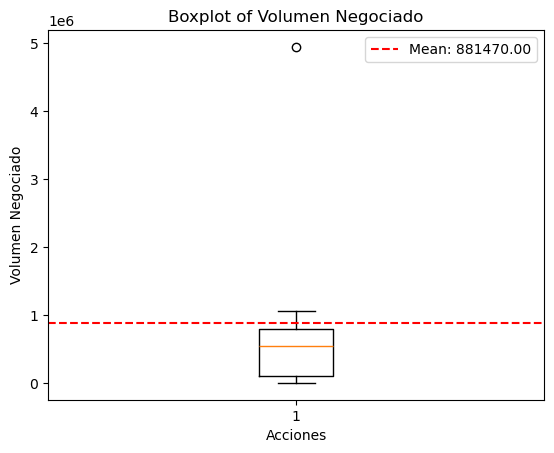

In [23]:
# generate a box plot 
import matplotlib.pyplot as plt
plt.boxplot([value[1] for value in acciones_bursatiles.values()])
# Display data of mean, range, and outlier on boxplot
data = [value[1] for value in acciones_bursatiles.values()]
mean_val = mean(data)
range_val = max(data) - min(data)
outliers = [x for x in data if x < (mean_val - 1.5 * range_val) or x > (mean_val + 1.5 * range_val)]

plt.title('Boxplot of Volumen Negociado')
plt.xlabel('Acciones')
plt.ylabel('Volumen Negociado')

# Display mean
plt.axhline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.legend()

plt.show()

Lo que se hace es multiplicar cada precio por el volumen
de acciones negociadas, con lo cual este volumen es el que da el
peso relativo a cada precio: a mayor volumen negociado, mayor
peso (ponderación) del precio en el promedio. Después, se divide la suma de estos productos entre la suma de los volúmenes.
Este procedimiento se puede resumir en la siguiente fórmula:

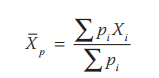

En donde *Xi* es la variable de interés, en este caso, los precios, y
*Pi* son los pesos o ponderaciones, en este caso, los volúmenes negociados

In [25]:
from typing import List

def mean_ponderado(xi: List[float], xp: List[float]) -> float:
    return sum(xi) / sum(xp)

In [21]:
promedio_precios_ponderado = mean_ponderado([value[2] for value in acciones_bursatiles.values()], [value[1] for value in acciones_bursatiles.values()])
print(f'Media (promedio) de precios ponderado: ',promedio_precios_ponderado)

Media (promedio) de precios ponderado:  43.63309063269311


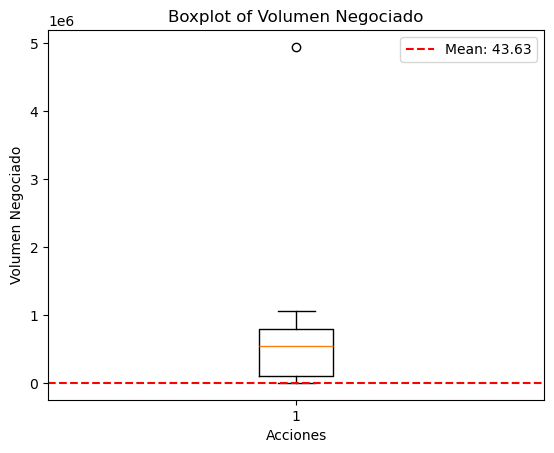

In [26]:
# generate a box plot 
import matplotlib.pyplot as plt
plt.boxplot([value[1] for value in acciones_bursatiles.values()])
# Display data of mean, range, and outlier on boxplot
data = [value[1] for value in acciones_bursatiles.values()]
mean_val = promedio_precios_ponderado
range_val = max(data) - min(data)
outliers = [x for x in data if x < (mean_val - 1.5 * range_val) or x > (mean_val + 1.5 * range_val)]

plt.title('Boxplot of Volumen Negociado')
plt.xlabel('Acciones')
plt.ylabel('Volumen Negociado')

# Display mean
plt.axhline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.legend()

plt.show()

Se nota que el promedio de precios subió principalmente debido
al mayor peso que se le dio al precio de, precisamente, CEMEXCPO, que tiene uno de los más altos.

**Media armónica**

****
La media armónica es el recíproco de la media aritmética de los recíprocos de los
valores individuales
****

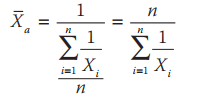

Se le suele utilizar para promediar distintas velocidades desarrolladas en distancias iguales

ejercicio 3.5

In [40]:
velocidad_promedio = {
    "A" : 100,
    "B" : 120,
    "C" : 140
}
km_conducidos = 3000  # 1000 km cada conductor

In [41]:
# media aritmética
print(mean(velocidad_promedio.values()))

120.0


En este ejemplo no es correcto usar la media aritmética porque
eso supondría que los conductores manejaron el mismo número
de horas, lo cual no es el caso, evidentemente, porque el conductor
más veloz manejó durante menos tiempo y viceversa. El promedio
correcto es la media armónica, 117.757 kilómetros por hora.

En otras palabras, si el promedio de velocidad fuera la media aritmética de 120 km/h entonces la distancia recorrida en
total por los 3 pilotos sería:

- Conductor A: 1 000/100 10 horas de manejo
- Conductor B: 1 000/120 8.3333 horas de manejo, y
- Conductor C: 1 000/140 7.1428 horas de manejo, para un total de 25.4761 horas.


In [65]:
km_x_conductor = km_conducidos / len(velocidad_promedio)
print(f'Conductor A {km_x_conductor /velocidad_promedio["A"]} horas de manejo')
print(f'Conductor B {km_x_conductor /velocidad_promedio["B"]} horas de manejo')
print(f'Conductor C {km_x_conductor /velocidad_promedio["C"]} horas de manejo')
km_recorridos =  sum(km_x_conductor / x for x in velocidad_promedio.values())

Conductor A 10.0 horas de manejo
Conductor B 8.333333333333334 horas de manejo
Conductor C 7.142857142857143 horas de manejo


In [54]:
from typing import List

# media armonica
def mean_armonic(xs: List[float]) -> float:
    return len(xs) / sum(1 / x for x in xs)


En este tiempo y a una velocidad promedio de 120 km/h se
recorrería un total de 120 × 25.4761 = 3057 kilómetros, lo cual no fue lo supuesto.

Por otro lado, a una velocidad de 117.757, la distancia recorrida en 25.4761 horas serían los 3 000 kilómetros planteados:

25.4761 × 117.757 = 2999.989 y la pequeña diferencia se debe a redondeo

In [68]:
velocidad_conductor_media_armonica = mean_armonic(velocidad_promedio.values())
print("Kilometros recorridos por los 3 pilotos: ",km_recorridos)
print("Media armónica: ",velocidad_conductor_media_armonica)
print(f'Recorrido total de: {(km_recorridos) * velocidad_conductor_media_armonica}')


Kilometros recorridos por los 3 pilotos:  25.476190476190478
Media armónica:  117.7570093457944
Recorrido total de: 3000.0000000000005


ejercicio 3.6

Una fábrica de juguetes se asignó a un grupo de 4 trabajadores
para completar una orden de 700 juguetes y la productividad de
cada trabajador es diferente según se muestra en la siguiente tabla:

In [69]:
productividad_trabajador = {
    "A" : 10, # minutos x juguete
    "B" : 6,
    "C" : 15,
    "D" : 4
}
juguetes = 700

Determine el número total de minutos que se requiere para
completar la orden.

se puede calcular una media del número de juguetes que
cada trabajador produce, ponderada por el tiempo que cada uno
de ellos se tarda en fabricarlos:

In [74]:
# media aritmética
print(mean(productividad_trabajador.values()),' min. por juguete')

8.75  min. por juguete


Sin embargo, como lo que interesa es saber cuánto tiempo se
requiere para cubrir la orden aprovechando al máximo la productividad de los trabajadores, se utiliza la media armónica con
los siguientes resultados

In [79]:
# a cada trabajador se le asigna el mismo número de juguetes,
asignacion = juguetes / len(productividad_trabajador)
assert asignacion == 175

print(f'Trabajador  A {asignacion / productividad_trabajador["A"]} x juguete ')
print(f'Trabajador B {asignacion / productividad_trabajador["B"]} x juguete ')
print(f'Trabajador C {asignacion / productividad_trabajador["C"]} x juguete ')
print(f'Trabajador D {asignacion / productividad_trabajador["D"]} x juguete ')
juguetes_fabricados =  sum(asignacion / x for x in productividad_trabajador.values())
print("Suma:",juguetes_fabricados)

Trabajador  A 17.5 x juguete 
Trabajador B 29.166666666666668 x juguete 
Trabajador C 11.666666666666666 x juguete 
Trabajador D 43.75 x juguete 
Suma: 102.08333333333333


O sea que se pueden fabricar, en promedio, 6.857 por minuto y, para completar la orden de 700 juguetes se requieren 6.85 x 700 = 4800 min

In [80]:
tiempo_juguete_media_armonica = mean_armonic(productividad_trabajador.values())
print("Tiempo de cada trabajador: ",juguetes_fabricados)
print("Media armónica: ",tiempo_juguete_media_armonica)
print(f'Se requieren : {(juguetes) * tiempo_juguete_media_armonica} minutos')


Tiempo de cada trabajador:  102.08333333333333
Media armónica:  6.857142857142857
Se requieren : 4800.0 minutos
